## Conceptos básicos en Keras

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas. No hay problema 
sino entiende todos los detalles; es un repaso rapido para entender y empezar a experimentar con los conceptos básicos 
de keras.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Importar el set de datos de moda de MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Al cargar el set de datos retorna cuatro arreglos NumPy

El arreglo **train_images** y **train_labels** son los arreglos que el modelo de datos usa para aprender.

El modelo es probado contra los arreglos para prueba que son **test_images** y **test_labels**

Las imágenes son 28x28 arreglos de Numpy, con valores de pixel que varían de 0 a 255. Los labels son arreglos de 
enteros, que van del 0 al 9. Estos valores corresponden a que clase de ropa representa cada etiqueta.

0   T-shirt/top

1   Trouser

2   Pullover

3   Dress

4   Coat

5   Sandal

6   Shirt

7   Sneaker

8   Bag

9   Ankle boot

Cada imagen es mapeada a una unica etiqueta. Ya que los Class names no estan incluidos en el dataset.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore el set de datos

Explore el formato de el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el 
set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [4]:
train_images.shape

(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:

In [5]:
len(train_labels)

60000

Cada etiqueta es un entero entre 0 y 9:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [7]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [8]:
len(test_labels)

10000

### Pre-procese el set de datos

El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de 
entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

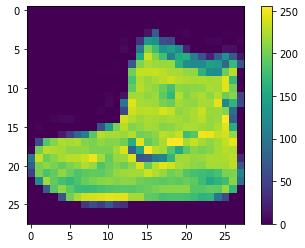

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacer eso, divida los 
valores por 255. Es importante que el training set y el testing set se pre-procesen de la misma forma:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, 
vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada 
imagen.

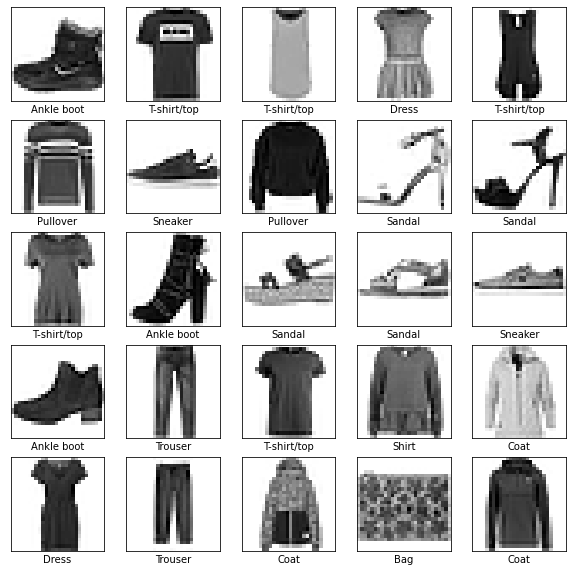

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

#### Configurar las Capas

Los bloques de construcción básicos de una red neuronal son las capas o layers. Las capas extraen representaciones 
del set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos 
solucionando.

La mayoría de aprendizaje profundo consiste de unir capas sencillas. La mayoría de las capas como tf.keras.layers.Dense, 
tienen parámetros que son aprendidos durante el entrenamiento.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compile el modelo

Antes de que el modelo esté listo para entrenar, se necesitan algunas configuraciones más. Estas son agregadas durante 
el paso de compilación del modelo:

Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. Puede minimizar esta función para dirigir el modelo en la dirección adecuada.

Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la función de perdida.

Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud), la fracción de la imágenes que son correctamente clasificadas.

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrenar el Modelo
Entrenar el modelo de red neuronal requiere de los siguientes pasos:

Entregue los datos de entrenamiento al modelo. En este ejemplo, el set de datos de entrenamiento están en los arreglos 
train_images y train_labels.

El modelo aprende a asociar imágenes y etiquetas.

Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo, incluido en el 
arreglo test_images. Verifique que las predicciones sean iguales a las etiquetas del arreglo test_labels.

Para comenzar a entrenar, llame el método model.fit, es llamado así porque fit (ajusta) el modelo a el set de datos de 
entrenamiento:

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 843us/step - loss: 0.5007 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.3741 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.3392 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.3156 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.2966 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 1s 799us/step - loss: 0.2829 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 2s 852us/step - loss: 0.2674 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2604 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2476 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.88 
(o 88%) sobre el set de datos de entrenamiento.

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3312 - accuracy: 0.8840

Test accuracy: 0.8840000033378601


## Hacer predicciones
Con el modelo entrenado puedes puede usarlo para hacer predicciones sobre imágenes.

In [16]:
predictions = model.predict(test_images)

Grafique las imágenes junto con el valor que predice para cada una de ellas. para poder ver todo el set de la 
predicción de las 10 clases.

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de predicción correctas están en 
azul y las incorrectas están en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predicha.

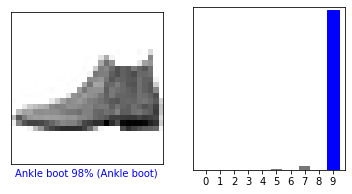

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

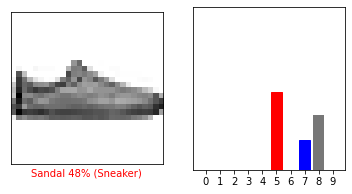

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar múltiples imágenes con sus predicciones. Nótese que el modelo puede estar equivocado aun cuando tiene 
mucha confianza.

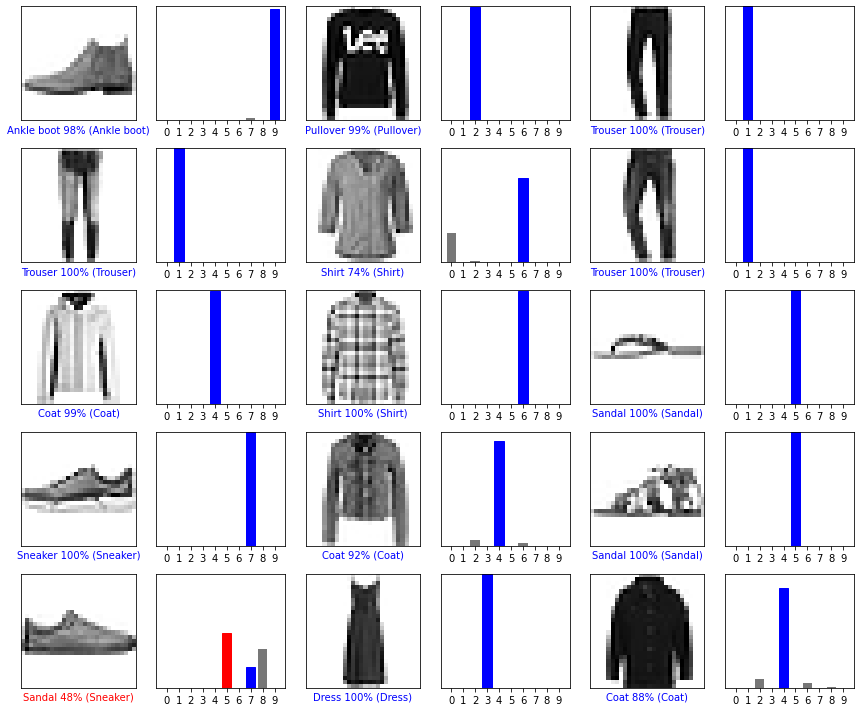

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una predicción sobre una única imagen.

In [21]:
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de tf.keras son optimizados sobre batch o bloques, o colecciones de ejemplos por vez. De acuerdo con esto, 
aunque use una única imagen toca agregarla a una lista:

In [22]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:

In [24]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1689667e-04 3.6740617e-14 9.9296111e-01 1.4970379e-09 2.5346922e-03
  3.7547422e-12 4.3872311e-03 2.0319354e-16 1.6373554e-09 5.7670687e-15]]


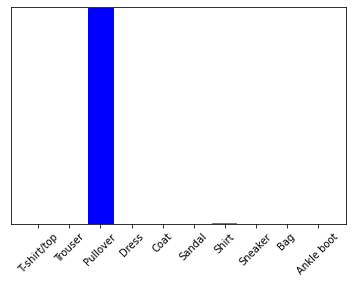

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

2

El modelo predice una etiqueta de 2.